In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
totals_test = pd.read_csv('../CapstoneDrafts/data/2017totals.csv', 
                        parse_dates=True, index_col=4)
totals_test.head()

,Unnamed: 0,Year,Month,Day,timeDelt,startweekday,totalRents,timeDelt_sq,holiday,date,station,precip,tmax,tmin,tmax_sq,tmin_sq,startdate2,day_0,day_1,day_2,day_3,day_4,day_5,day_6
startdate,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,2017,1,1,0,6,4063,0,0.0,NaN,USC00186350,0.00,47.0,31.0,2209.0,961.0,2017-01-01,0,0,0,0,0,0,1
2017-01-02,1,2017,1,2,1,0,1638,1,0.0,NaN,USC00186350,0.03,55.0,38.0,3025.0,1444.0,2017-01-02,1,0,0,0,0,0,0
2017-01-03,2,2017,1,3,2,1,3771,4,0.0,NaN,USC00186350,0.30,46.0,42.0,2116.0,1764.0,2017-01-03,0,1,0,0,0,0,0
2017-01-04,3,2017,1,4,3,2,7185,9,0.0,NaN,USC00186350,0.69,50.0,44.0,2500.0,1936.0,2017-01-04,0,0,1,0,0,0,0
2017-01-05,4,2017,1,5,4,3,6214,16,0.0,NaN,USC00186350,0.00,55.0,29.0,3025.0,841.0,2017-01-05,0,0,0,1,0,0,0


In [3]:
X_main=totals_test.drop(['totalRents','date','station','startdate2'], axis=1)
y_test = totals_test['totalRents']

In [4]:
X_test = totals_test[['timeDelt', 'timeDelt_sq','tmax', 'tmin','tmax_sq','tmax_sq',
             'day_0','day_1','day_2','day_3','day_4','day_5','holiday']]

In [5]:
import pickle
model_path = 'ridge_reg_20180523.pkl'
# Loading the saved decision tree model pickle
model_pkl = open(model_path, 'rb')
ridge_cv = pickle.load(model_pkl)
print ("Loaded Decision tree model :: ", ridge_cv)

Loaded Decision tree model ::  RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=True, scoring=None, store_cv_values=False)


In [6]:
ridge_cv.alpha_

0.1

In [7]:
totals_test['predicted_ridge_test'] = ridge_cv.predict(X_test)

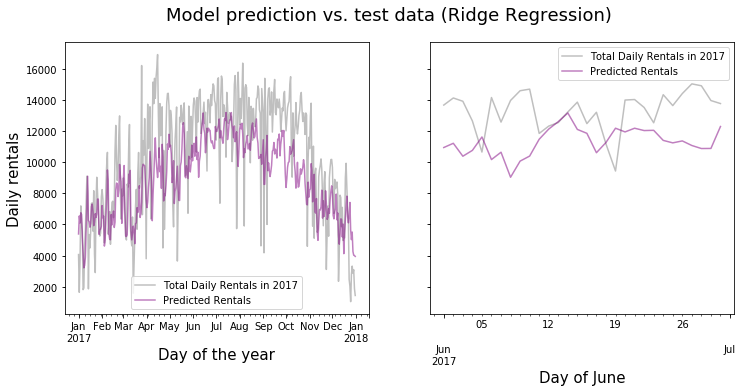

In [75]:
#predicted vs. actual plots
fig, axes = plt.subplots(1,2, sharey=True)
fig.set_size_inches(12,5)
fig.suptitle('Model prediction vs. test data (Ridge Regression)', fontsize=18)
totals_test[['totalRents', 'predicted_ridge_test']].plot(alpha=0.5, ax=axes[0], color=('grey', 'purple'))
totals_test[['totalRents', 'predicted_ridge_test']].loc['06-2017'].plot(alpha=0.5, ax=axes[1], color=('grey','purple'))
axes[0].legend(('Total Daily Rentals in 2017','Predicted Rentals'))
axes[1].legend(('Total Daily Rentals in 2017','Predicted Rentals'))
axes[0].set_ylabel('Daily rentals',fontsize=15)
axes[0].set_xlabel('Day of the year', fontsize=15)
axes[1].set_xlabel('Day of June', fontsize=15)
plt.savefig('pred_with_actual',bbox_inches='tight',dpi=300)

#### Judging the model
How well does the final model predict the actual 2017 test data?

In [9]:
from scipy.stats.stats import pearsonr
(r,p) = pearsonr(totals_test['predicted_ridge_test'], totals_test['totalRents'])
print('The pearson r correlation between predicted and test values is', r.round(2), 
     ' and the p value for this relationship is ', p.round(2))

The pearson r correlation between predicted and test values is 0.74  and the p value for this relationship is  0.0


In [76]:
months = ['01-2017','02-2017','03-2017','04-2017','05-2017','06-2017',
          '07-2017','08-2017','09-2017','10-2017','11-2017','12-2017']
month_names = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_stats = []
for month in months:
    month_stats.append(pearsonr(totals_test['predicted_ridge_test'].loc[month], totals_test['totalRents'].loc[month]))

month_stats = pd.DataFrame(month_stats, columns=('r','p'))
month_stats = month_stats.set_index(pd.DatetimeIndex(months))
month_stats

,r,p
2017-01-01,0.505856,0.003694
2017-02-01,0.615765,0.000486
2017-03-01,0.535240,0.001918
2017-04-01,0.230137,0.221157
2017-05-01,0.345693,0.056801
2017-06-01,-0.354815,0.054361
2017-07-01,-0.136880,0.462788
2017-08-01,0.125797,0.500114
2017-09-01,0.053849,0.777472
2017-10-01,0.234825,0.203518


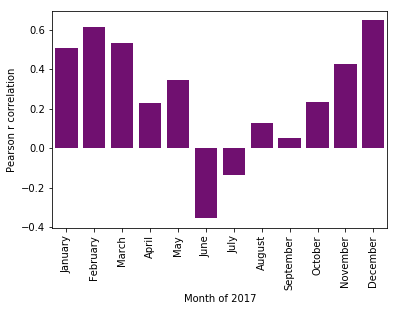

In [84]:
fig,ax = plt.subplots(1,1)
sns.barplot(x=month_stats.index, y=month_stats['r'], ax=ax, color='purple')
ax.set_ylabel('Pearson r correlation')
ax.set_xlabel('Month of 2017')
ax.set_xticklabels(month_names)
plt.xticks(rotation=90)
plt.savefig('model_corr_bymonth',bbox_inches='tight',dpi=300)

#### Interpretation 

In [11]:
totals_test.head()

,Unnamed: 0,Year,Month,Day,timeDelt,startweekday,totalRents,timeDelt_sq,holiday,date,station,precip,tmax,tmin,tmax_sq,tmin_sq,startdate2,day_0,day_1,day_2,day_3,day_4,day_5,day_6,predicted_ridge_test
startdate,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,2017,1,1,0,6,4063,0,0.0,NaN,USC00186350,0.00,47.0,31.0,2209.0,961.0,2017-01-01,0,0,0,0,0,0,1,5384.049326
2017-01-02,1,2017,1,2,1,0,1638,1,0.0,NaN,USC00186350,0.03,55.0,38.0,3025.0,1444.0,2017-01-02,1,0,0,0,0,0,0,6541.537163
2017-01-03,2,2017,1,3,2,1,3771,4,0.0,NaN,USC00186350,0.30,46.0,42.0,2116.0,1764.0,2017-01-03,0,1,0,0,0,0,0,6083.273591
2017-01-04,3,2017,1,4,3,2,7185,9,0.0,NaN,USC00186350,0.69,50.0,44.0,2500.0,1936.0,2017-01-04,0,0,1,0,0,0,0,6744.124102
2017-01-05,4,2017,1,5,4,3,6214,16,0.0,NaN,USC00186350,0.00,55.0,29.0,3025.0,841.0,2017-01-05,0,0,0,1,0,0,0,6633.454545


In [12]:
heatprep = totals_test.groupby('tmin')['tmax','totalRents'].mean()
heatprep['tmax'] = heatprep['tmax'].round()
heatprep.head()

,tmax,totalRents
tmin,,
15.0,26.0,3122.75
17.0,29.0,3521.50
18.0,32.0,1876.00
21.0,43.0,6133.00
22.0,39.0,4799.75


In [13]:
heatdata = heatprep.pivot(columns='tmax',values='totalRents')
heatdata = heatdata.sort_index(ascending=False)

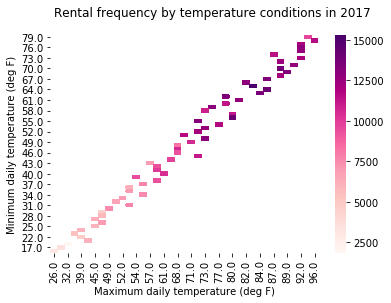

In [88]:
fig,ax = plt.subplots(1,1)
sns.heatmap(heatdata, cmap='RdPu', ax=ax)
ax.set_ylabel('Minimum daily temperature (deg F)')
ax.set_xlabel('Maximum daily temperature (deg F)')
fig.suptitle('Rental frequency by temperature conditions in 2017')
plt.savefig('temp_heatmap',bbox_inches='tight',dpi=300)